# 🧽 **Cleaning raw log data**

**Import useful libraries**

In [ ]:
import os
import glob
import pandas as pd

import logging
logging.getLogger().setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import warnings
warnings.filterwarnings('ignore')

from utilities import (
    MatToJsonConverter,
    JSONUtils, 
    DataProcessor,
    DataVisualizer
)

**Define basic folder paths**

In [2]:
# Define folder names
DATA_FOLDER_NAME = r".\data"

IMOLA_20241128_FOLDER_NAME = os.path.join(DATA_FOLDER_NAME, "2024_11_28-Imola")
MAT_IMOLA_20241128_FOLDER_NAME = os.path.join(IMOLA_20241128_FOLDER_NAME, "mat")
JSON_IMOLA_20241128_FOLDER_NAME = os.path.join(IMOLA_20241128_FOLDER_NAME, "json")

IMOLA_20250113_FOLDER_NAME = os.path.join(DATA_FOLDER_NAME, "2025_01_13-Imola")
MAT_IMOLA_20250113_FOLDER_NAME = os.path.join(IMOLA_20250113_FOLDER_NAME, "mat")
JSON_IMOLA_20250113_FOLDER_NAME = os.path.join(IMOLA_20250113_FOLDER_NAME, "json")

IMOLA_20250114_FOLDER_NAME = os.path.join(DATA_FOLDER_NAME, "2025_01_14-Imola")
MAT_IMOLA_20250114_FOLDER_NAME = os.path.join(IMOLA_20250114_FOLDER_NAME, "mat")
JSON_IMOLA_20250114_FOLDER_NAME = os.path.join(IMOLA_20250114_FOLDER_NAME, "json")

## 🪄 File Format Trasnformation: from MATLAB to JSON

In [3]:
# List of source (MAT) and destination (JSON) folder pairs
data_folders = [
    (MAT_IMOLA_20241128_FOLDER_NAME, JSON_IMOLA_20241128_FOLDER_NAME),
    (MAT_IMOLA_20250113_FOLDER_NAME, JSON_IMOLA_20250113_FOLDER_NAME),
    (MAT_IMOLA_20250114_FOLDER_NAME, JSON_IMOLA_20250114_FOLDER_NAME)
]

# Iterate through each folder pair
for source_folder, destination_folder in data_folders:
    print("\n" + "="*60)
    print(f"Converting all .mat files in '{source_folder}' → '{destination_folder}'...")
    print("="*60)

    # Get all .mat files in the source folder
    mat_files = glob.glob(os.path.join(source_folder, "*.mat"))
    print(f"Searching for .mat files in: {source_folder}")
    print(f"Pattern used: {os.path.join(source_folder, '*.mat')}")
    print(f"✅ {len(mat_files)} files found.\n")

    # Convert each .mat file to .json
    for index, mat_file in enumerate(mat_files, start=1):
        dest_json_filename = os.path.join(destination_folder, os.path.basename(mat_file).replace(".mat", ".min.json"))

        print(f"[{index}/{len(mat_files)}] Converting: {mat_file} → {dest_json_filename}")

        try:
            MatToJsonConverter.convert_file(mat_file, dest_json_filename, minified=True, debug=False)
            print(f"✅ Done: {mat_file}")
        except Exception as e:
            print(f"❌ Error converting {mat_file}: {e}")

    print(f"🎉 Conversion completed for {source_folder}!\n")


Converting all .mat files in '.\data\2024_11_28-Imola\mat' → '.\data\2024_11_28-Imola\json'...
Searching for .mat files in: .\data\2024_11_28-Imola\mat
Pattern used: .\data\2024_11_28-Imola\mat\*.mat
✅ 10 files found.

[1/10] Converting: .\data\2024_11_28-Imola\mat\1016-Log.mat → .\data\2024_11_28-Imola\json\1016-Log.min.json
Loading MATLAB file: .\data\2024_11_28-Imola\mat\1016-Log.mat
Successfully converted MATLAB file to JSON: .\data\2024_11_28-Imola\json\1016-Log.min.json
✅ Done: .\data\2024_11_28-Imola\mat\1016-Log.mat
[2/10] Converting: .\data\2024_11_28-Imola\mat\1117-Log.mat → .\data\2024_11_28-Imola\json\1117-Log.min.json
Loading MATLAB file: .\data\2024_11_28-Imola\mat\1117-Log.mat
Successfully converted MATLAB file to JSON: .\data\2024_11_28-Imola\json\1117-Log.min.json
✅ Done: .\data\2024_11_28-Imola\mat\1117-Log.mat
[3/10] Converting: .\data\2024_11_28-Imola\mat\1118-Log.mat → .\data\2024_11_28-Imola\json\1118-Log.min.json
Loading MATLAB file: .\data\2024_11_28-Imola\mat\

## 🚞 Exploring Data

To start using the data, it’s important to first inspect the available values.
Since the project goal is to predict or detect car faults, we decided to extract
only the channels that log errors during test sessions.

The regular expression is used:

```python
"^(?!.*ECUCAN).*(Pack_Error|PackError|Inverter_Fault|InverterFault)s?.*$"
```

Its purpose is to filter out overly specific errors 
(like those related to internal ECU communications) and keep only general fault 
signals like `Pack_Error` and `Inverter_Fault`. This choice helps gather a larger
and more meaningful set of error samples for modeling, focusing only on the
most relevant, high-level faults.


📂 Processing dataset: .\data\2024_11_28-Imola\json
  🔍 Found 10 .min.json files in '.\data\2024_11_28-Imola\json'

  📄 Analyzing file: .\data\2024_11_28-Imola\json\1016-Log.min.json
  ----------------------------------------
    🔸 Extracting values for key: ECUMeas_ECUMisc_Driver_Errors_PackError
        🔹 Values count: {0: 12109, 1: 50}
    🔸 Extracting values for key: ECUMeas_ECUMisc_Driver_Errors_InverterFault
        🔹 Values count: {0: 12159, 1: 0}

  📄 Analyzing file: .\data\2024_11_28-Imola\json\1117-Log.min.json
  ----------------------------------------
    🔸 Extracting values for key: ECUMeas_ECUMisc_Driver_Errors_PackError
        🔹 Values count: {0: 19933, 1: 100}
    🔸 Extracting values for key: ECUMeas_ECUMisc_Driver_Errors_InverterFault
        🔹 Values count: {0: 20033, 1: 0}

  📄 Analyzing file: .\data\2024_11_28-Imola\json\1118-Log.min.json
  ----------------------------------------
    🔸 Extracting values for key: ECUMeas_ECUMisc_Driver_Errors_PackError
        🔹 Va

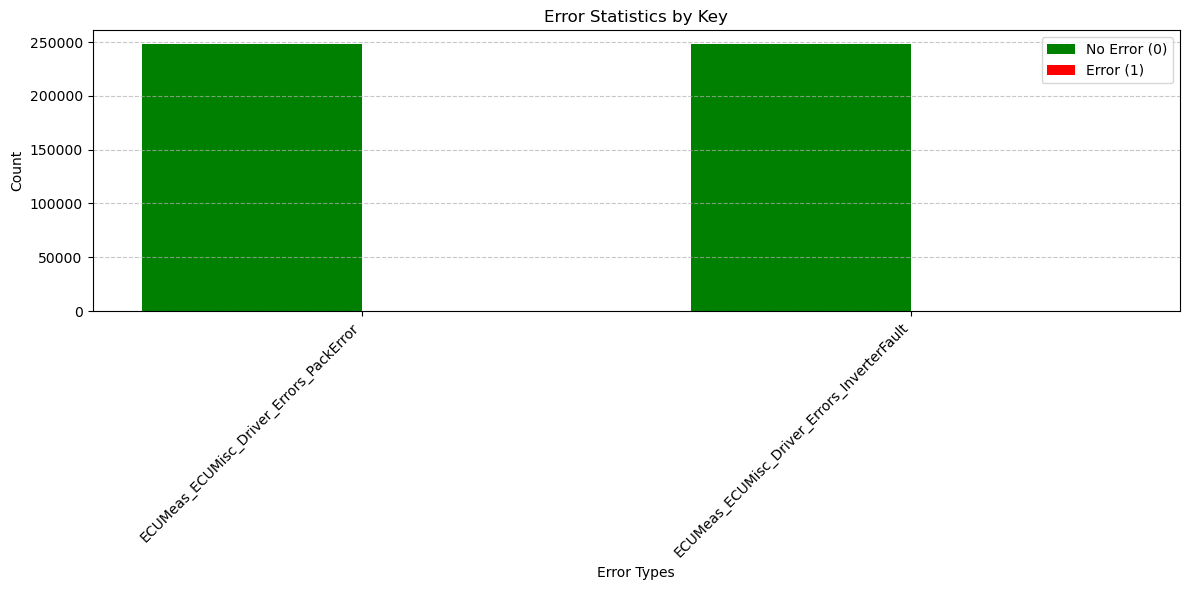


📂 Processing dataset: .\data\2025_01_13-Imola\json
  🔍 Found 21 .min.json files in '.\data\2025_01_13-Imola\json'

  📄 Analyzing file: .\data\2025_01_13-Imola\json\20250113-1442-Log.min.json
  ----------------------------------------
    🔸 Extracting values for key: Pack_Error_BMS_Overvolt
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_BMS_Undervolt
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_BMS_OverTemp
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_IMD_Isolation
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_IMD_Fault
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_Prechg_Timeout
        🔹 Values count: {0: 11979, 1: 0}
    🔸 Extracting values for key: Pack_Error_EMCY
        🔹 Values count: {0: 11968, 1: 11}
    🔸 Extracting values for key: Pack_Error_Overcurrent
        🔹 Values count: {0: 1

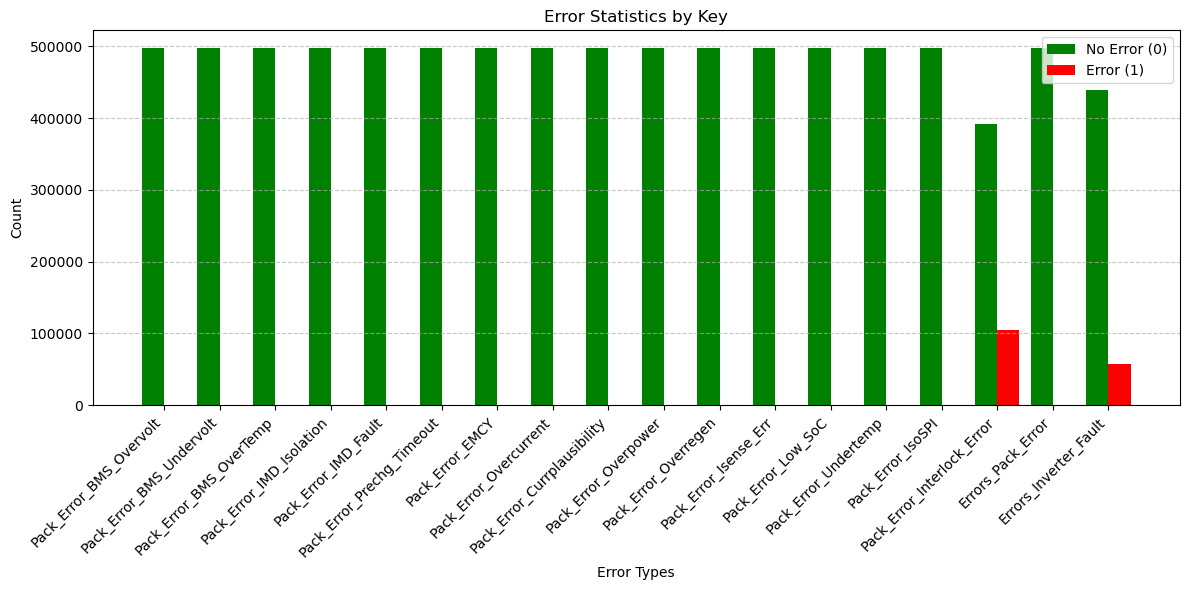


📂 Processing dataset: .\data\2025_01_14-Imola\json
  🔍 Found 30 .min.json files in '.\data\2025_01_14-Imola\json'

  📄 Analyzing file: .\data\2025_01_14-Imola\json\20250114-0845-Log.min.json
  ----------------------------------------
    🔸 Extracting values for key: Pack_Error_BMS_Overvolt
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_BMS_Undervolt
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_BMS_OverTemp
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_IMD_Isolation
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_IMD_Fault
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_Prechg_Timeout
        🔹 Values count: {0: 15946, 1: 0}
    🔸 Extracting values for key: Pack_Error_EMCY
        🔹 Values count: {0: 15926, 1: 20}
    🔸 Extracting values for key: Pack_Error_Overcurrent
        🔹 Values count: {0: 1

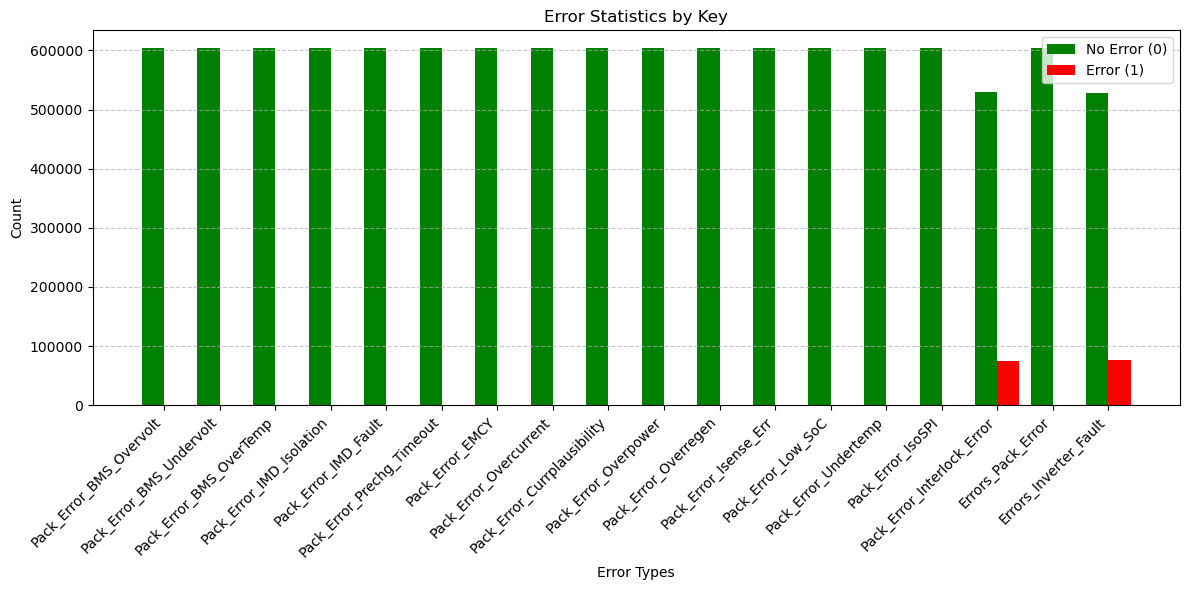


🎉 All datasets processed successfully!


In [12]:
# List of datasets to process (each tuple contains: source folder, base output folder)
datasets = [
    (JSON_IMOLA_20241128_FOLDER_NAME, IMOLA_20241128_FOLDER_NAME),
    (JSON_IMOLA_20250113_FOLDER_NAME, IMOLA_20250113_FOLDER_NAME),
    (JSON_IMOLA_20250114_FOLDER_NAME, IMOLA_20250114_FOLDER_NAME),
]

# Define the regex for error keys
# error_regex = r"(error|failure|fault|problem)"
# error_regex = r"(?=.*(error|failure|fault|problem))(?=.*ECUMisc)"
error_regex = r"^(?!.*ECUCAN).*(Pack_Error|PackError|Inverter_Fault|InverterFault)s?.*$"

# Process each dataset
for source_folder, base_output_folder in datasets:
    print("\n" + "=" * 60)
    print(f"📂 Processing dataset: {source_folder}")
    print("=" * 60)

    # Define the output folder for error statistics
    errors_output_folder = os.path.join(base_output_folder, "error_statistics")
    os.makedirs(errors_output_folder, exist_ok=True)  # Ensure output directory exists

    # Get all .min.json files in the source folder
    json_files = glob.glob(os.path.join(source_folder, "*.min.json"))
    print(f"  🔍 Found {len(json_files)} .min.json files in '{source_folder}'")

    # Dictionary to store aggregated statistics for this dataset
    error_statistics = {}

    # Process each .min.json file
    for json_file in json_files:
        print(f"\n  📄 Analyzing file: {json_file}")
        print("  " + "-" * 40)

        # Load the JSON data
        json_data = JSONUtils.load_json(file_path=json_file)

        # Get keys matching the error regex
        matching_keys = JSONUtils.get_keys(json_data, error_regex)

        if matching_keys:
            for key in matching_keys:
                print(f"    🔸 Extracting values for key: {key}")

                try:
                    extracted_values = JSONUtils.extract_value(json_data, key)[key]
                
                    # Normalize extracted_values to always be a list
                    if not isinstance(extracted_values, list):
                        extracted_values = [extracted_values]

                    # Count occurrences of 0s and 1s
                    value_counts = {0: 0, 1: 0}
                    for val in extracted_values:
                        if val in [0, 1]:  # Ensure values are only 0 or 1
                            value_counts[val] += 1

                    # Aggregate results into error_statistics
                    if key not in error_statistics:
                        error_statistics[key] = {0: 0, 1: 0}

                    error_statistics[key][0] += value_counts[0]
                    error_statistics[key][1] += value_counts[1]
                    print(f"        🔹 Values count: {error_statistics[key]}")
                except Exception as e:
                    print(f"    ⚠ Exception: {e}")
                    continue
        else:
            print("    ⚠ No error-related keys found in this file.")

    # Save the aggregated statistics for this dataset
    stats_output_file = os.path.join(errors_output_folder, "error_statistics.json")
    JSONUtils.dump_json(error_statistics, stats_output_file)

    print("\n  ✅ Processing complete for this dataset.")
    print(f"  📈 Error statistics saved to: {stats_output_file}")

    # Plot error statistics for this dataset
    print("\n  Generating error statistics plot...")
    DataVisualizer.plot_error_statistics(error_statistics)

print("\n🎉 All datasets processed successfully!")

As shown in the plots above, errors are very rare and do not appear in every file.
Due to this strong class imbalance, supervised fault prediction is not very feasible.

For this reason, we propose the following approach: 
**use the available data to train a Dynamic Bayesian Network (DBN) to model the 
normal behavior of the car, and then perform real-time anomaly detection by 
evaluating the log-likelihood score against a custom threshold.**

The DBN’s performance can still be evaluated in a supervised manner, 
since the dataset includes a flag indicating fault occurrences.


It is worth noting that, although no inverter faults were recorded in the 
`2024-11-28` dataset, this data can still be used to train the DBN on normal behavior.

Together with the powertrain unit, it was decided to select only the
`Inverter Fault` as the target for this anomaly detection project.
This choice was motivated by the fact that some signals had already been identified
as potential causes of this fault, making it easier to define causal relationships
based on the semantic meaning of the signals.

Specifically, the following **14 keys** will be retained in the processed datasets:

1.  `InverterSpeed_RearLeft_RPM` and `InverterSpeed_RearRight_RPM`:
    * Rotational speed of the left and right rear inverters (in revolutions per minute, RPM).

2.  `BatteryVoltage_V`
    * The voltage of the battery pack (in volts, V).

3.  `BatteryCurrent_A`
    * The current flowing through the battery pack (in amperes, A).

4.  `Inverter_Id_Ref_RearLeft_A` and `Inverter_Id_Ref_RearRight_A`
    * The d-axis current reference for the left and right rear inverters (in amperes, A).

5.  `Inverter_Iq_Ref_RearLeft_A` and `Inverter_Iq_Ref_RearRight_A`
    * The q-axis current reference for the left and right rear inverters (in amperes, A).

6.  `MotorTemp_RearLeft_C` and `MotorTemp_RearRight_C`
    * Temperature of the left and right rear motors (in Celsius degrees, °C).

7. `InverterTemp_RearLeft_C` and `InverterTemp_RearRight_C`
    * Temperature of the left and right rear inverters (in Celsius degrees, °C).

8. `BatteryPackTemp_C`
    * Temperature of the battery pack (in Celsius degrees, °C).

9. `InverterFault`
    * Error code indicating generic fault signals from the motor inverter system.

## 🏗️ Processing Data

The following steps are applied to each dataset to clean the raw log data:

1. Concatenate all minified JSON files into a single data structure.
2. Standardize the column names between the 2024 and 2025 datasets.
3. Filter out irrelevant channels.

Since the logs come from two different years (2024 and 2025), the naming conventions differ.
To ensure consistency, the keys of interest were mapped to a unified naming scheme.

In [13]:
# Define source folders containing .min.json files
source_folders = [
    (JSON_IMOLA_20241128_FOLDER_NAME, "20241128-imola"),
    (JSON_IMOLA_20250113_FOLDER_NAME, "20250113-imola"),
    (JSON_IMOLA_20250114_FOLDER_NAME, "20250114-imola")
]

# Define the output folder for processed datasets
DATASETS_OUTPUT_FOLDER = os.path.join(DATA_FOLDER_NAME, "datasets-imola")
os.makedirs(DATASETS_OUTPUT_FOLDER, exist_ok=True)  # Ensure output folder exists

print(f"📂 Output directory: {DATASETS_OUTPUT_FOLDER}\n")

# Process each source folder
for source_folder, source_name in source_folders:
    try:
        print("\n" + "=" * 100)
        print(f"🔍 Processing dataset: {source_name}")
        print("=" * 100)

        # Get all .min.json files in the source folder
        json_files = glob.glob(os.path.join(source_folder, "*.min.json"))

        if not json_files:
            print(f"⚠ No JSON files found in '{source_folder}'. Skipping...\n")
            continue

        # Define the file name for the output dataset
        output_file = os.path.join(DATASETS_OUTPUT_FOLDER, source_name + ".csv")

        print(f"  📄 Found {len(json_files)} JSON files. Merging into: {output_file}")

        # Load and concatenate JSON files into a single DataFrame
        concatenated_df = DataProcessor.load_and_concat_json(json_files)
        print(f"  ✅ Data merged. Shape: {concatenated_df.shape}")

        # Standardize variable names across datasets
        standardized_df = DataProcessor.unify_variable_names(concatenated_df)
        print(f"  🔄 Variable names standardized. Shape: {standardized_df.shape}")

        # Filter dataset channels if necessary
        filtered_df = DataProcessor.filter_dataset_channels(standardized_df)
        print(f"  🎯 Dataset filtered. Shape: {filtered_df.shape}")

        # Save the final dataset
        DataProcessor.save_dataset(filtered_df, output_file, file_format="csv")
        print(f"  ✅ Dataset saved: {output_file}")

    except Exception as e:
        print(f"❌ Error processing '{source_folder}': {e}")

print("\n🎉 All datasets processed successfully!")


📂 Output directory: .\data\datasets-imola


🔍 Processing dataset: 20241128-imola
  📄 Found 10 JSON files. Merging into: .\data\datasets-imola\20241128-imola.csv
Loaded .\data\2024_11_28-Imola\json\1016-Log.min.json, shape: (12159, 483)
Loaded .\data\2024_11_28-Imola\json\1117-Log.min.json, shape: (7874, 483)
Loaded .\data\2024_11_28-Imola\json\1118-Log.min.json, shape: (39522, 483)
Loaded .\data\2024_11_28-Imola\json\1126-Log.min.json, shape: (42331, 483)
Loaded .\data\2024_11_28-Imola\json\1150-Log.min.json, shape: (21084, 483)
Loaded .\data\2024_11_28-Imola\json\1154-Log.min.json, shape: (23556, 483)
Loaded .\data\2024_11_28-Imola\json\1158-Log.min.json, shape: (31041, 483)
Loaded .\data\2024_11_28-Imola\json\1208-Log.min.json, shape: (27414, 483)
Loaded .\data\2024_11_28-Imola\json\1239-Log.min.json, shape: (28321, 483)
Loaded .\data\2024_11_28-Imola\json\1244-Log.min.json, shape: (15146, 483)
Total concatenated shape: (248448, 483)
  ✅ Data merged. Shape: (248448, 483)
Renamed 14 c

### 🔷 Data aggregation

In [3]:
# List of CSV file paths (original dataset → aggregated output)
csv_file_paths = [
    (r'.\data\datasets-imola\20241128-imola.csv', r'.\data\aggregated-datasets-imola\agg-20241128-imola.csv'),
    (r'.\data\datasets-imola\20250113-imola.csv', r'.\data\aggregated-datasets-imola\agg-20250113-imola.csv'),
    (r'.\data\datasets-imola\20250114-imola.csv', r'.\data\aggregated-datasets-imola\agg-20250114-imola.csv'),
]

# Aggregation factor (10ms → 100ms)
AGGREGATION_FACTOR = 10  

print("\n📊 Starting time-series aggregation...\n")

# Process each CSV file
for csv_file_path, output_file in csv_file_paths:
    print("\n" + "=" * 100)
    print(f"📂 Processing file: {csv_file_path}")

    # Check if file exists before loading
    if not os.path.exists(csv_file_path):
        print(f"❌ Error: File not found: {csv_file_path}. Skipping...")
        continue

    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(csv_file_path)
        print(f"✅ Loaded data successfully. Shape: {df.shape}")

        # Aggregate time-series data
        aggregated_df = DataProcessor.aggregate_time_series(df, AGGREGATION_FACTOR, "mean")
        print(f"📊 Aggregated data. New shape: {aggregated_df.shape}")

        # Display dataset info
        print("\n🔍 Aggregated DataFrame Summary:")
        print(aggregated_df.info())

        # Save the aggregated dataset
        DataProcessor.save_dataset(aggregated_df, output_file, file_format="csv")
        print(f"✅ Saved aggregated data to: {output_file}")

    except Exception as e:
        print(f"❌ Error processing file '{csv_file_path}': {e}")

print("\n🎉 All files processed successfully!")


📊 Starting time-series aggregation...


📂 Processing file: .\data\datasets-imola\20241128-imola.csv
✅ Loaded data successfully. Shape: (248448, 14)
numeric_columns Index(['BatteryCurrent_A', 'BatteryPackTemp_C', 'BatteryVoltage_V',
       'InverterSpeed_RearLeft_RPM', 'InverterSpeed_RearRight_RPM',
       'InverterTemp_RearLeft_C', 'InverterTemp_RearRight_C',
       'Inverter_Id_Ref_RearLeft_A', 'Inverter_Id_Ref_RearRight_A',
       'Inverter_Iq_Ref_RearLeft_A', 'Inverter_Iq_Ref_RearRight_A',
       'MotorTemp_RearLeft_C', 'MotorTemp_RearRight_C'],
      dtype='object')
Aggregated data using mean over windows of size 10. New shape: (24845, 14)
📊 Aggregated data. New shape: (24845, 14)

🔍 Aggregated DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24845 entries, 0 to 24844
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BatteryVoltage_V             24845 non-nul